In [4]:
system("git clone https://github.com/CarlosKunze/Case-Study---Smart-Device-Fitness-Data-Analysis.git")


#Bellabeat Case Study: Understanding Smart Device Usage to Guide Marketing Strategy

## Google Data Analytics Capstone Project

Make data driven desicions to improve the marketing strategy of the welness technology company Bellabeat

## Context
Bellabeat is a high-tech wellness company that manufactures smart products designed to help women understand their health and daily habits. The company’s goal is to use data insights to improve its marketing strategy and expand its position in the global smart device market.

As a (hypothetical) junior data analyst on Bellabeat’s marketing analytics team, my task is to analyze smart device usage data to discover patterns in consumer behavior and recommend marketing strategies based on the results.
The analysis will be performed using the six-step process proposed by Google:



* ❓ Ask
* 💻 Prepare
* 🛠 Process
* 📊 Analyze
* 📋 Share
* 🧗‍♀️ Act

# 1. ❓ Ask
In the "Ask" phase, we define our business task.

The goal of this analysis is to identify trends in smart device usage using publicly available FitBit fitness tracker data.
By understanding how users track their daily activity, sleep, and calorie expenditure, we aim to uncover patterns that can inform Bellabeat’s marketing strategy.

Before we start, we take a quick look at the available datasets and brainstorm possible results and how they can be achieved. This will give us a better guideline throughout the project.


The results will be presented to our stakeholders by a report (i.e., this notebook).

## Overview
To give us a better understanding of how data can help us answer this business question and to understand how we need to prepare the data to give us insights that can help the marketing team, we take a first glance at the available data. Then we brainstorm some questions and ideas that help us guide our cleaning and analysis process.

####Some questions that could be answered with the data could be:

1.  When are users most active during the day or week?
2.  How much sleep do users get, and when?
3. What’s the relationship between steps, calories, activity level, and sleep?
4. Are users more active on weekdays or weekends?
5. What times or habits correlate with better consistency?
6. What are the seasonal or monthly activity trends?

####These questions could help us with our marketing strategy in the following way:

1. Send motivational app notifications before high-activity hours. Schedule social media posts or email campaigns during users’ most active hours.
2. Promote sleep-related products (like the "Leaf" product).
3. Design targeted campaigns for each profile: motivational messages for low-activity users, mindfulness content for sleep-deprived users, or performance-focused challenges for high-activity users.
4. Tailor marketing campaigns for weekends and weekdays.
5. Reward consistent users with loyalty badges; send reminders to less consistent users to re-engage them with Bellabeat’s app or membership program.
6. Seasonal Campaigns—Launch “Winter Wellness” programs or discounts during low-activity months. Promote app challenges in spring/summer when users are more active.

# 2. 💻 Prepare
In this step, the goal is to identify, understand, and assess the dataset that will be used for the analysis.
For this project, I will use the FitBit Fitness Tracker Data, which is publicly available on [Kaggle](https://www.kaggle.com/datasets/arashnic/fitbit/data)
 under a CC0: Public Domain license.
This dataset contains personal fitness tracking information from 30 Fitbit users who consented to share their data. It includes minute-, hourly-, and daily-level measurements of:

* Physical activity (steps, intensity, distance, calories)

* Sleep patterns (total minutes asleep, time in bed)

* Heart rate

* Weight and BMI

The data is stored in multiple CSV files, each representing a specific aspect of user activity. These files will be downloaded, and a copy will be saved on the local device. Then they will be imported into Google Colab for cleaning and analysis using "R". Finally, a final Tableau dashboard will be created with a summary of the results.
Before starting to work with the data, we take a closer look at the available data; the Kaggle dataset contains more data tables than actual data, as some of the tables are stored in wide and narrow format. For example:

In [5]:
library(tidyverse)
library(dplyr)
#calories_narrow <- read.csv("Case-Study---Smart-Device-Fitness-Data-Analysis/data/minuteCaloriesNarrow_merged.zip", header = TRUE)
calories_wide <- read.csv("Case-Study---Smart-Device-Fitness-Data-Analysis/data/minuteCaloriesWide_merged.csv")
head(calories_narrow)
head(calories_wide)

,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,⋯,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,⋯,0.9438,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438
2,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,⋯,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
3,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,⋯,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
4,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,⋯,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
5,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,⋯,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
6,1503960366,4/13/2016 5:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,⋯,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865


I am only going to use the narrow data as it is a more familiar form of data storage. The stored data in every table follows the same logic:

In [ ]:
table_example <- data.frame(
  Id = character(),
  Time_unit = character(),
  Value = numeric(),
  stringsAsFactors = FALSE
)
colnames(table_example)

[1] "Id"        "Time_unit" "Value"

Every one of the 30 fitbit users has their own unique ID, and the "time unit" can be a time interval of a second, minute, hour, or day. For our purpose, we need "hours" as a time unit. Minutes and seconds are for our purpose to specify. Therefore, we need to transform the data to the right time unit. To get insights on which days users engage more or less in activity, we need to transform the date format to weekdays.

##Data Credibility and Limitations
While the dataset is well-structured, there are several limitations to consider:

* The sample size (30 users) is relatively small and may not represent the full diversity of Bellabeat’s customer base.

* Information about gender and age is not available. This may be important when, e.g., dealing with outliers referring to weight or daily calorie consumption.

* Data was collected voluntarily, which could introduce self-selection bias.

* Third-party data: collect using a survey on Amazon Mechanical Turk

* The data is from March 2016 through May 2016. The data is not current, meaning that user habits may have changed over the years.

* The data originates from Fitbit devices, not Bellabeat products—meaning insights must be applied carefully and only as general behavioral trends.

# 3. 🛠 Process
To clean and process the data in this case study i used "R".
First off we set up the enviroment

In [19]:
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("lubridate")
install.packages("janitor")
install.packages("skimr")
install.packages("here")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
library(tidyverse)
library(dplyr)
library(lubridate)
library(janitor)
library(ggplot2)
library(skimr)
library(here)

As already said, only the hourly and daily data is needed. Therefore, I made two tables: one containing the daily and one the hourly data. First, we import the dataset we used for the analysis.

In [6]:
daily_activity <- read.csv("Case-Study---Smart-Device-Fitness-Data-Analysis/data/dailyActivity_merged.csv")
daily_sleep<- read.csv("Case-Study---Smart-Device-Fitness-Data-Analysis/data/sleepDay_merged.csv")

calories_per_hour <- read.csv("Case-Study---Smart-Device-Fitness-Data-Analysis/data/hourlyCalories_merged.csv")
steps_per_hour <- read.csv("Case-Study---Smart-Device-Fitness-Data-Analysis/data/hourlySteps_merged.csv")
sleep_per_minute_raw <- read.csv("Case-Study---Smart-Device-Fitness-Data-Analysis/data/minuteSleep_merged.csv")

weigth_info_raw <- read.csv("Case-Study---Smart-Device-Fitness-Data-Analysis/data/weightLogInfo_merged.csv")


I split the "process" part in two. First I processed the "daily data", then the "hourly data". First we get an overview of the daily data:
##3.1 Daily Data  

In [24]:
glimpse(daily_activity)
glimpse(daily_sleep)
summary(daily_activity)
summary(daily_sleep)

Rows: 457
Columns: 16
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <date> 2016-03-25, 2016-03-26, 2016-03-27, 2016-03-…
$ TotalSteps               <int> 11004, 17609, 12736, 13231, 12041, 10970, 122…
$ TotalDistance            <dbl> 7.11, 11.55, 8.53, 8.93, 7.85, 7.16, 7.86, 7.…
$ TrackerDistance          <dbl> 7.11, 11.55, 8.53, 8.93, 7.85, 7.16, 7.86, 7.…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 2.57, 6.92, 4.66, 3.19, 2.16, 2.36, 2.29, 3.3…
$ ModeratelyActiveDistance <dbl> 0.46, 0.73, 0.16, 0.79, 1.09, 0.51, 0.49, 0.8…
$ LightActiveDistance      <dbl> 4.07, 3.91, 3.71, 4.95, 4.61, 4.29, 5.04, 3.6…
$ SedentaryActiveDistance  <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.0…
$ VeryActiveMinutes        <int> 33, 89, 56, 39, 28, 30, 33, 47, 40, 15, 43, 3…
$ FairlyActiveMinutes      <int> 12, 17, 5, 20, 28, 13, 12, 21, 11, 30, 18, 18…
$ LightlyActiveMin

       Id                 date              TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2016-03-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.347e+09   1st Qu.:2016-04-02   1st Qu.: 1988   1st Qu.: 1.410  
 Median :4.057e+09   Median :2016-04-05   Median : 5986   Median : 4.090  
 Mean   :4.629e+09   Mean   :2016-04-04   Mean   : 6547   Mean   : 4.664  
 3rd Qu.:6.392e+09   3rd Qu.:2016-04-08   3rd Qu.:10198   3rd Qu.: 7.160  
 Max.   :8.878e+09   Max.   :2016-04-12   Max.   :28497   Max.   :27.530  
 TrackerDistance LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.00   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 1.28   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 4.09   Median :0.0000           Median : 0.000    
 Mean   : 4.61   Mean   :0.1794           Mean   : 1.181    
 3rd Qu.: 7.11   3rd Qu.:0.0000           3rd Qu.: 1.310    
 Max.   :27.53   Max.   :6.7271           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Se

       Id                 date            TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :1.000     Min.   : 58.0     
 1st Qu.:3.977e+09   1st Qu.:2016-04-19   1st Qu.:1.000     1st Qu.:361.0     
 Median :4.703e+09   Median :2016-04-27   Median :1.000     Median :433.0     
 Mean   :5.001e+09   Mean   :2016-04-26   Mean   :1.119     Mean   :419.5     
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:1.000     3rd Qu.:490.0     
 Max.   :8.792e+09   Max.   :2016-05-12   Max.   :3.000     Max.   :796.0     
 TotalTimeInBed    weekday         
 Min.   : 61.0   Length:413        
 1st Qu.:403.0   Class :character  
 Median :463.0   Mode  :character  
 Mean   :458.6                     
 3rd Qu.:526.0                     
 Max.   :961.0                     

There are no negative values. However, the date has the wrong format. Therefore, I changed the date format and extracted the weekday and renamed the columns.

In [23]:
daily_activity <- daily_activity %>%
  mutate(
    ActivityDate = as.Date(ActivityDate, format = "%m/%d/%Y"),
    weekday = weekdays(ActivityDate)
  ) %>%
  rename(date=ActivityDate)
daily_sleep <- daily_sleep %>%
  mutate(
    SleepDay = as.Date(SleepDay, format = "%m/%d/%Y %I:%M:%S %p"),
    weekday = weekdays(SleepDay)
  ) %>%
  rename(date=SleepDay)

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `ActivityDate = as.Date(ActivityDate, format =
  "%m/%d/%Y")`.
[1mCaused by error:[22m
[33m![39m object 'ActivityDate' not found


To merge the tables a shared column is necessary. I checked if the column "id" corresponds in both tables so see if they are mergable.

In [9]:
n_distinct(daily_activity$Id)
n_distinct(daily_sleep$Id)
all(daily_sleep$Id %in% daily_activity$Id)

[1] 35

[1] 24

[1] TRUE

The daily_sleep table contains fewer participants. However, the ids all correspond with ids in the daily_activity table. Therefore, I could join the tables (full join so all the data is merged).

In [10]:
daily_data_merged <- daily_activity %>%
  full_join(
    daily_sleep,
    by = c("Id" = "Id", "date" = "date", "weekday"="weekday")
  )

Now I cleaned the data within the new "daily table" to assure consistency and clean data for the analysis.

In [25]:
daily_data_cleaned <- daily_data_merged %>%
  #1. Remove duplicates
  distinct() %>%
  #2. Remove rows without date or id
  filter(!is.na(Id), !is.na(date)) %>%
  #3. Set negative values to NA (just to be sure)
  mutate(across(where(is.numeric), ~ ifelse(!is.na(.x) & .x < 0, NA, .x)))

#4. Convert table names to a consistent format
daily_data_cleaned <- clean_names(daily_data_cleaned)

#Sort the table after weekdays (from monday - friday)
weekday_levels <- c("Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag")

daily_data_cleaned <- daily_data_cleaned %>%
  mutate(weekday = factor(weekday, levels = weekday_levels)) %>%
  arrange(weekday)

I controled the data to check that everything is in order.

In [26]:
colSums(is.na(daily_data_cleaned))
summary(select(daily_data_cleaned, where(is.numeric)))

sample_n(daily_data_cleaned, 10)

id                       date 
                         0                          0 
               total_steps             total_distance 
                       398                        398 
          tracker_distance logged_activities_distance 
                       398                        398 
      very_active_distance moderately_active_distance 
                       398                        398 
     light_active_distance  sedentary_active_distance 
                       398                        398 
       very_active_minutes      fairly_active_minutes 
                       398                        398 
    lightly_active_minutes          sedentary_minutes 
                       398                        398 
                  calories                    weekday 
                       398                        855 
       total_sleep_records       total_minutes_asleep 
                       445                        445 
         total_time_in_bed 
                       445

       id             total_steps    total_distance   tracker_distance
 Min.   :1.504e+09   Min.   :    0   Min.   : 0.000   Min.   : 0.00   
 1st Qu.:2.891e+09   1st Qu.: 1988   1st Qu.: 1.410   1st Qu.: 1.28   
 Median :4.445e+09   Median : 5986   Median : 4.090   Median : 4.09   
 Mean   :4.800e+09   Mean   : 6547   Mean   : 4.664   Mean   : 4.61   
 3rd Qu.:6.776e+09   3rd Qu.:10198   3rd Qu.: 7.160   3rd Qu.: 7.11   
 Max.   :8.878e+09   Max.   :28497   Max.   :27.530   Max.   :27.53   
                     NA's   :398     NA's   :398      NA's   :398     
 logged_activities_distance very_active_distance moderately_active_distance
 Min.   :0.0000             Min.   : 0.000       Min.   :0.0000            
 1st Qu.:0.0000             1st Qu.: 0.000       1st Qu.:0.0000            
 Median :0.0000             Median : 0.000       Median :0.0200            
 Mean   :0.1794             Mean   : 1.181       Mean   :0.4786            
 3rd Qu.:0.0000             3rd Qu.: 1.310       3rd

id,date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,weekday,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<date>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>
5577150313,2016-04-09,10494,7.84,7.84,0.00000,4.91,0.78,2.15,0,123,62,138,601,3817,NA,NA,NA,NA
7007744171,2016-04-08,12627,9.65,8.45,4.84232,4.70,0.74,4.21,0,54,22,301,1063,2871,NA,NA,NA,NA
4558609924,2016-05-01,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,115,129
7086361926,2016-04-04,6101,3.87,3.87,0.00000,0.53,0.23,3.10,0,31,24,138,1247,2421,NA,NA,NA,NA
4319703577,2016-04-03,8223,5.52,5.52,0.00000,0.80,1.51,3.21,0,12,37,257,551,2178,NA,NA,NA,NA
4388161847,2016-04-28,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,428,458
2026352035,2016-04-06,3180,1.97,1.97,0.00000,0.00,0.00,1.97,0,0,0,185,738,1421,NA,NA,NA,NA
6290855005,2016-04-05,0,0.00,0.00,0.00000,0.00,0.00,0.00,0,0,0,0,1440,2060,NA,NA,NA,NA
5577150313,2016-04-18,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1,527,553


Everything looks good. Now I continued with the "hourly data".
##3.2. Hourly Data
We already imported the csv. files. The process is the same as for the "daily data" only that we need to transform one csv. files to the format in hours. The three csv files used for the "hourly data" are:

* calories_per_hour
* steps_per_hour
* sleep_per_minute_raw

First I took a look at the data.





In [27]:
summary(calories_per_hour)
summary(steps_per_hour)
summary(sleep_per_minute_raw)

       Id            ActivityHour          Calories     
 Min.   :1.504e+09   Length:24084       Min.   : 42.00  
 1st Qu.:2.347e+09   Class :character   1st Qu.: 61.00  
 Median :4.559e+09   Mode  :character   Median : 77.00  
 Mean   :4.889e+09                      Mean   : 94.27  
 3rd Qu.:6.962e+09                      3rd Qu.:104.00  
 Max.   :8.878e+09                      Max.   :933.00  

       Id            ActivityHour         StepTotal      
 Min.   :1.504e+09   Length:24084       Min.   :    0.0  
 1st Qu.:2.347e+09   Class :character   1st Qu.:    0.0  
 Median :4.559e+09   Mode  :character   Median :   10.0  
 Mean   :4.889e+09                      Mean   :  286.2  
 3rd Qu.:6.962e+09                      3rd Qu.:  289.0  
 Max.   :8.878e+09                      Max.   :10565.0  

       Id                date               value           logId          
 Min.   :1.504e+09   Length:198559      Min.   :1.000   Min.   :1.110e+10  
 1st Qu.:2.347e+09   Class :character   1st Qu.:1.000   1st Qu.:1.117e+10  
 Median :4.703e+09   Mode  :character   Median :1.000   Median :1.124e+10  
 Mean   :4.824e+09                      Mean   :1.086   Mean   :1.124e+10  
 3rd Qu.:6.776e+09                      3rd Qu.:1.000   3rd Qu.:1.131e+10  
 Max.   :8.792e+09                      Max.   :3.000   Max.   :1.137e+10  

There are no negative values. The "date" column (ActivityHour) is "chr" type. Therefore, I changed it to the correct date format. Some values for the sleep data contain the value "2" for 1 minute of sleep, which is unrealistic. I started by cleaning the calories_per_hour table, and then continued in the same manner for the steps_per_hour table.

In [28]:
calories_per_hour <- calories_per_hour %>%
  mutate(
    # change date type
    ActivityHour = as.POSIXct(ActivityHour, format = "%m/%d/%Y %I:%M:%S %p"),

    # extract the weekday
    Weekday = weekdays(ActivityHour),

    # extract the hour from the date
    Hour = format(ActivityHour, "%H")
  ) %>%

  rename(date=ActivityHour)

  steps_per_hour <- steps_per_hour %>%
  mutate(
    #change date type
    ActivityHour = as.POSIXct(ActivityHour, format = "%m/%d/%Y %I:%M:%S %p"),

    # extract weekday
    Weekday = weekdays(ActivityHour),

    # extract the hour
    Hour = format(ActivityHour, "%H")
  ) %>%
  rename(date=ActivityHour)

Then I transformed the sleep_per_minute table into sleep_per_hour

In [29]:
sleep_per_hour <- sleep_per_minute_raw %>%
  #change date type
  mutate(date = as.POSIXct(date, format = "%m/%d/%Y %I:%M:%S %p")) %>%
  #round the date to full hour
  mutate(date = floor_date(date, unit = "hour")) %>%
  #group by id & date
  group_by(Id, date) %>%
  #sum the values for 60 minutes of sleep with a max. of 60
  summarise(SleepMinutes = min(sum(value, na.rm = TRUE), 60), .groups = "drop")

  #extract the weekday from the date
  sleep_per_hour <- sleep_per_hour %>%
  mutate(
    Weekday = weekdays(date)
  )


Now, before merging the tables I checked again if the ids correspond in each table, i.e. they can be merged to the table to the same id.

In [30]:
#chek if the ids are the same and if the dates correspond
n_distinct(calories_per_hour$Id)
n_distinct(steps_per_hour$Id)
n_distinct(sleep_per_hour$Id)

#Sleep table has less id's -> Check if the Ids are the same
all(sleep_per_hour$Id %in% calories_per_hour$Id)
all(sleep_per_hour$Id %in% steps_per_hour$Id)
all(calories_per_hour$id %in% steps_per_hour$Id)

[1] 34

[1] 34

[1] 23

[1] TRUE

[1] TRUE

[1] TRUE

The sleep data has fewer participants (less id's) however all the id's correspond with the id's of the other tables. Therefore, we can join the tables and for the remaining id's there will be NA for the sleep data.

In [31]:
hourly_data <- calories_per_hour %>%
  full_join(steps_per_hour,
    by = c("Id" = "Id", "date" = "date", "Weekday"="Weekday")) %>%
  full_join(sleep_per_hour,
    by = c("Id"="Id", "date"="date", "Weekday"="Weekday" )) %>%
  #eliminate the hour columns from the other tables
  select(-Hour.x) %>%
  select(-Hour.y)


Now I cleaned the final table.

In [32]:
hourly_data_cleaned <- hourly_data %>%
  distinct() %>%
  filter(!is.na(Id), !is.na(date)) %>%
  #remove negative values (to be sure eventough there are none)
  mutate(across(where(is.numeric), ~ ifelse(!is.na(.x) & .x < 0, NA, .x)))

hourly_data_cleaned<- clean_names(hourly_data_cleaned)

Next, I controlled the new table.

In [38]:
colSums(is.na(hourly_data_cleaned))
summary(select(hourly_data_cleaned, where(is.numeric)))

id          date      calories       weekday    step_total 
            0             0            21             0            21 
sleep_minutes 
        20316

       id               calories        step_total      sleep_minutes  
 Min.   :1.504e+09   Min.   : 42.00   Min.   :    0.0   Min.   : 1.00  
 1st Qu.:2.347e+09   1st Qu.: 61.00   1st Qu.:    0.0   1st Qu.:60.00  
 Median :4.559e+09   Median : 77.00   Median :   10.0   Median :60.00  
 Mean   :4.890e+09   Mean   : 94.27   Mean   :  286.2   Mean   :53.38  
 3rd Qu.:6.962e+09   3rd Qu.:104.00   3rd Qu.:  289.0   3rd Qu.:60.00  
 Max.   :8.878e+09   Max.   :933.00   Max.   :10565.0   Max.   :60.00  
                     NA's   :21       NA's   :21        NA's   :20316  

For the final visualization in Tableau, it would be helpful to have the data already organized/ summed up by hour and weekday. Therefore, I made a summary table that I directly can use for visualization.

In [42]:
hourly_data_summary <- hourly_data_cleaned %>%
  mutate(Hour=hour(date)) %>%
  #group by weekday and hour
  group_by(weekday, Hour) %>%
  #calculate the average for all useres at the same hour & weekday
  summarise(
    AvgCalories = mean(calories, na.rm = TRUE),
    AvgSteps = mean(step_total, na.rm = TRUE),
    AvgSleep = mean(sleep_minutes, na.rm = TRUE),
    Count = n())

#Sort by weekday in order from monday - sunday
weekday_levels <- c("Montag", "Dienstag", "Mittwoch", "Donnerstag", "Freitag", "Samstag", "Sonntag")

hourly_data_summary <- hourly_data_summary %>%
  mutate(weekday = factor(weekday, levels = weekday_levels)) %>%
  arrange(weekday, Hour)
#Save the two data tables
#write_csv(hourly_data_summary, "Path")
#Write_csv(daily_data_cleaned, "Path")



`summarise()` has grouped output by 'weekday'. You can override using the
`.groups` argument.


#4. 📊 Analyze

In this step, the goal is to explore the cleaned Fitbit dataset, identify patterns, relationships, and trends, and translate them into insights that support Bellabeat’s marketing strategy.
The analysis focuses on daily activity, sleep, and calorie metrics, as well as patterns across days of the week and hours of the day.

Although the data processing was done in R, Tableau was used for visualization and exploratory analysis because of its powerful capabilities for pattern recognition and storytelling through data. I tried to keep the analysis closely connected to our desired marketing insights. Therefore, I analyzed the data in various steps.

* 1. Analyze and understand our average user; How does he spend most of his time, in what activity does he engage and when (weekday)

* 2. Analyze behavior over the week; when are users the most active, how does the sleep change over the week, are there differences between weekdays and weekend?

* 3. At which hours during each day are users most active, how does the sleep distribute over the days

Before diving into the visual analysis I made a quick summary in R to get insights on the average user and relevant statistics (here average, standard derivation & relative standard derivation) (small sample number of users (~30) will result in less statistical accuracy).

In [43]:
#first i made a new table for the weight and BMI
#Avg = Average
#SD = Standard derivation
#RSD = Relative standard derivation
stats_weight <- weigth_info_raw %>%
  summarise(
    Avg_Weight = mean(WeightKg, na.rm = TRUE),
    SD_Weight = sd(WeightKg, na.rm = TRUE),
    RSD_Weight = (SD_Weight / Avg_Weight) * 100,
    Avg_BMI = mean(BMI, na.rm = TRUE),
    SD_BMI = sd(BMI, na.rm = TRUE),
    RSD_BMI = (SD_BMI / Avg_BMI) * 100
  )
  #now i repeated the same for the data in the daily_data_cleaned tabel
  stats_daily <- daily_data_cleaned %>%
  summarise(
    Avg_Calories = mean(calories, na.rm = TRUE),
    SD_Calories = sd(calories, na.rm = TRUE),
    RSD_Calories = (SD_Calories / Avg_Calories) * 100,
    Avg_Sedentary = mean(sedentary_minutes, na.rm = TRUE),
    SD_Sedentary = sd(sedentary_minutes, na.rm = TRUE),
    RSD_Sedentary = (SD_Sedentary / Avg_Sedentary) * 100,
    Avg_Lightly = mean(lightly_active_minutes, na.rm=TRUE),
    SD_Lightly = sd(lightly_active_minutes, na.rm = TRUE),
    RSD_Lightly = (SD_Lightly/Avg_Lightly)*100,
    Avg_Fairly = mean(fairly_active_minutes, na.rm = TRUE),
    SD_Fairly = sd(fairly_active_minutes, na.rm = TRUE),
    RSD_Fairly = (SD_Fairly/Avg_Fairly)*100,
    Avg_Very = mean(very_active_minutes, na.rm = TRUE),
    SD_Very = sd(very_active_minutes, na.rm = TRUE),
    RSD_Very = (SD_Very/Avg_Very)*100,
    Avg_Sleep = (mean(total_minutes_asleep, na.rm = TRUE))/60,
    SD_Sleep = (sd(total_minutes_asleep, na.rm = TRUE))/60,
    RSD_Sleep = (SD_Sleep/Avg_Sleep)*100,
    Avg_Steps = mean(total_steps, na.rm = TRUE),
    SD_Steps = sd(total_steps, na.rm = TRUE),
    RSD_Steps = (SD_Steps / Avg_Steps) * 100
  )

#now I united the new tables
summary_stats <- bind_cols(stats_weight, stats_daily)

#the table is not very clearly arranged so I made a new table

# unite both summaries in a new long table
to_long <- function(df) {
  df %>%
    # Columns follow the same naming; Avg_Weight_kg, SD_Weight, RSD_Weight
    #Therefore wer can extract the names
    pivot_longer(
      everything(),
      names_to   = c(".value", "Metric"),
      names_pattern = "^(Avg|SD|RSD)_(.*)$"
    ) %>%
    rename(Average = Avg) %>%
    mutate(
      # Name the metric
      Metric = gsub("_", " ", Metric),
      Metric = tools::toTitleCase(Metric)
    )
}

tbl_weight <- to_long(stats_weight)
tbl_daily  <- to_long(stats_daily)

summary_table <- bind_rows(tbl_weight, tbl_daily) %>%
  # Order
  select(Metric, Average, SD, RSD) %>%
  mutate(
    `RSD (%)` = RSD,                  # make clear column names
    Average   = round(Average, 2),
    SD        = round(SD, 2),
    `RSD (%)` = round(`RSD (%)`, 2)
  ) %>%
  select(Metric, Average, SD, `RSD (%)`) %>%
  arrange(desc(`RSD (%)`))

#safe the final table
#write.csv(summary_table, "Path")



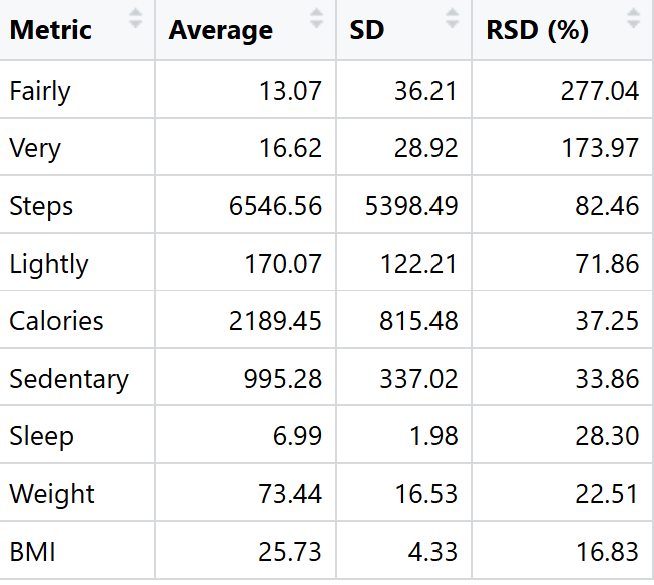

Some insights of our average user: Average user weighs 73,4 kg, has an BMI of 25,7 sleeps 7 hours, walks 6500 steps a day and burns 2190 kcal per day.
However, due to the small sample amount we deal with very high standard derivations which means our insights are less accurate.

#5. 📋 Share & Analyze

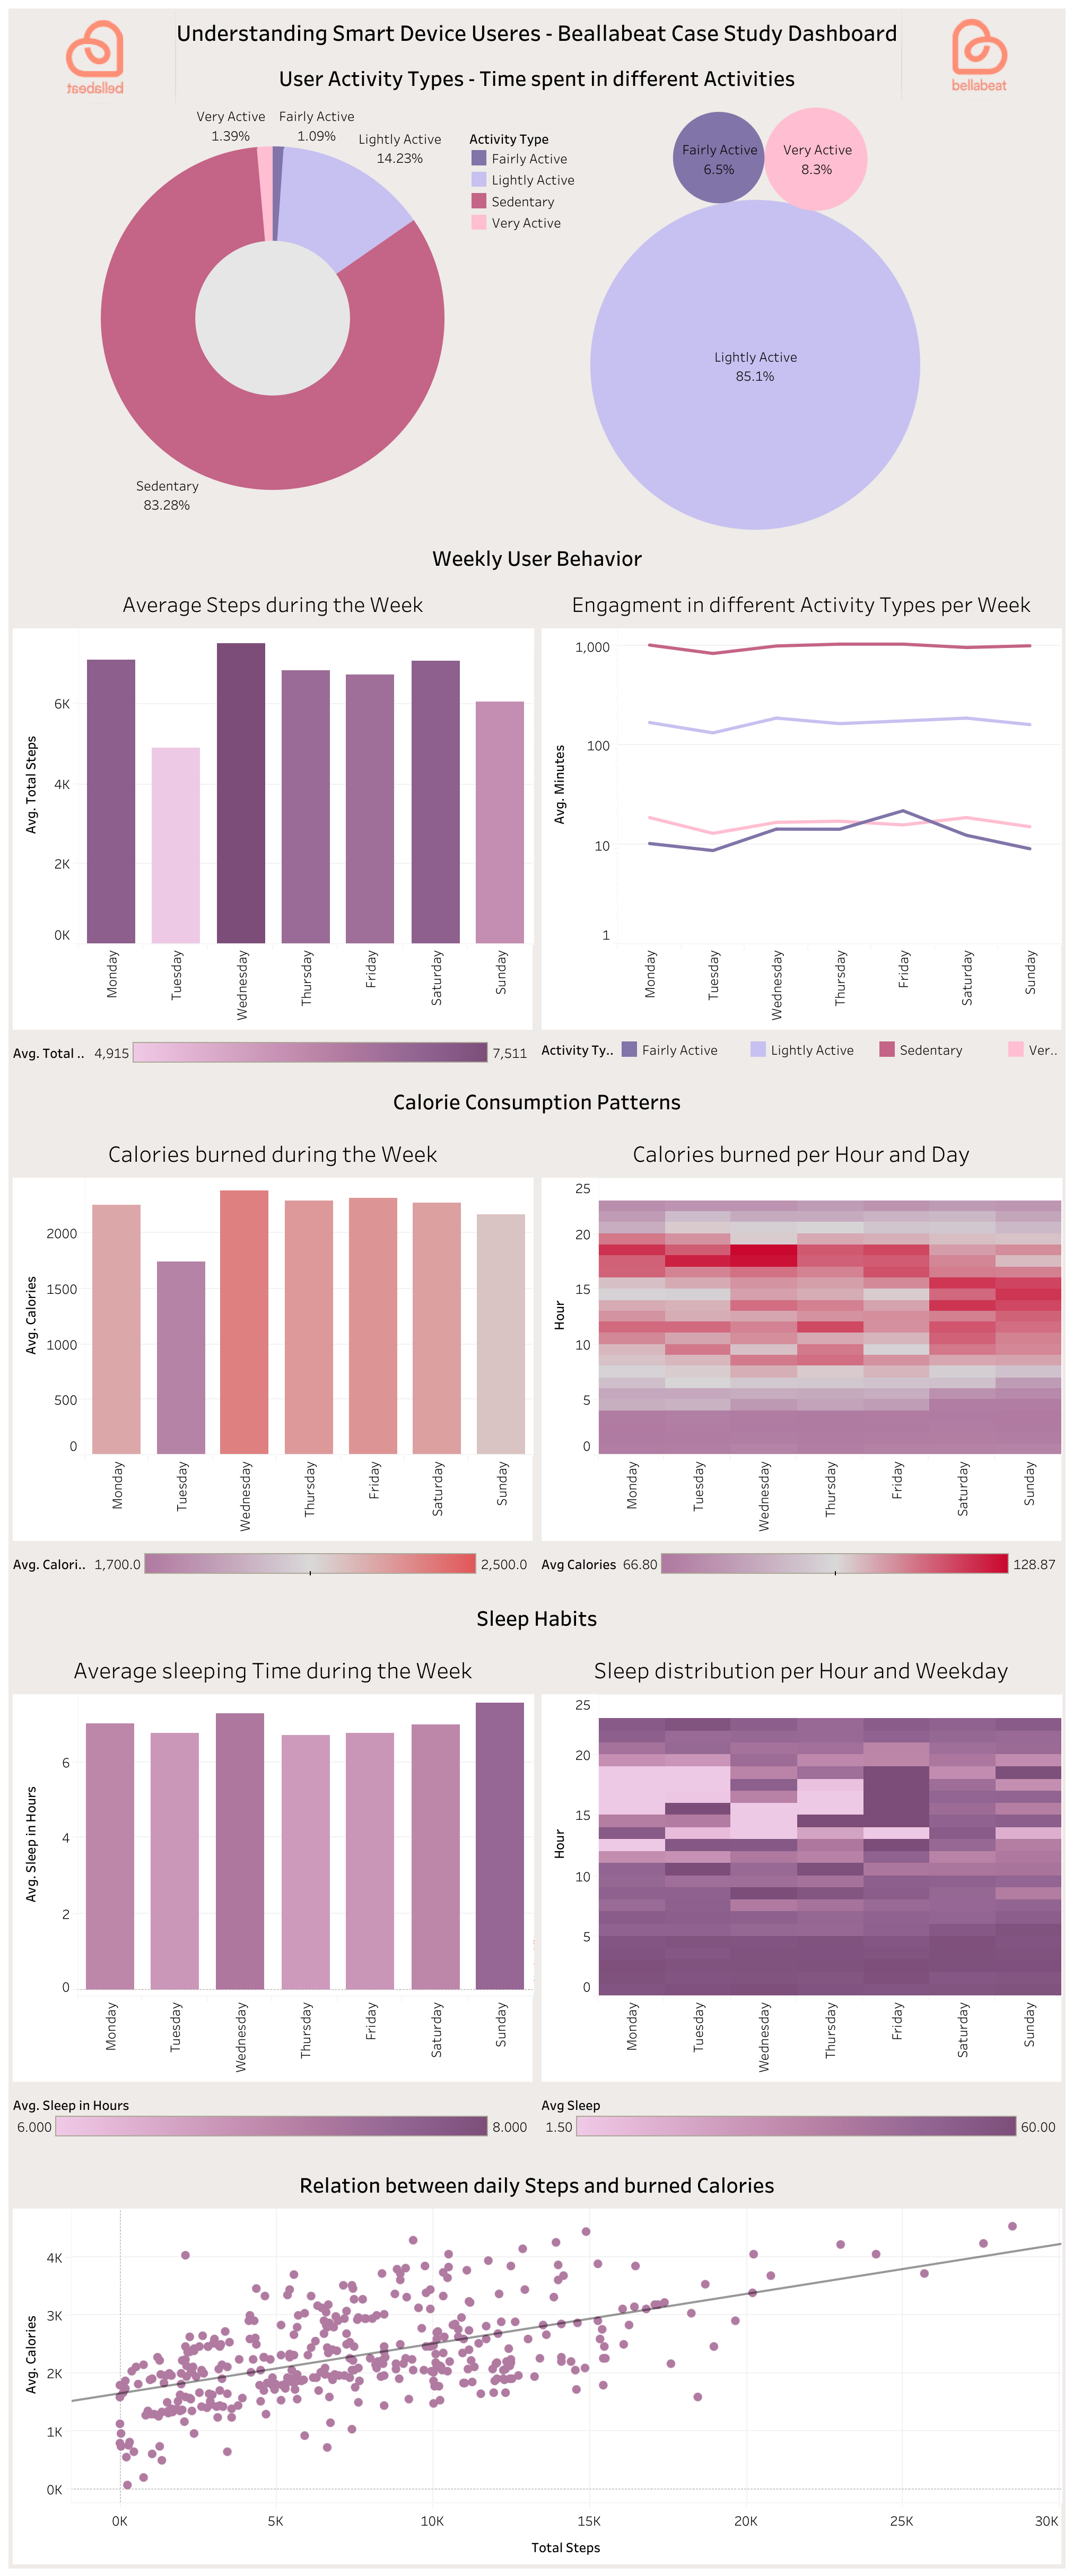

The standard derivations are very high across all analyzed parameters. This is partly due to the very small sample amount (~30). The very high standard derivations for the activity types (fairly active, very active, etc...) and the steps could also reveal the fact that there generally are different user types. I.e., some users tend to prefer "very active" activity at all times they get engaged in activity, while others tend to prefer light activity. This again means that the different user types continue behaving and using the smart device equipment for different purposes.

First, I identified the average user. As seen in the first pie chart, the average user spends most of his time sedentary. When physical activity is performed, light activity (could be yoga, jogging etc…) is preferred.
Over the week, there are no clear patterns in activity engagement. Only for "Fairly Active" minutes spent, there is a peak on Friday. This could mean users like to engage in activities like jogging or other types of sport after work before the weekend.
For the average steps walked, and average calories burned, we can see a sudden decrease on Tuesdays. In addition, we can't identify significant differences for these parameters during the week vs. on the weekend.

To intensify the analysis when users tend to engage in physical activity, I analyzed the calorie consumption per hour to look for patterns at which time on each day users tend to get active. The heatmap shows us in red when users are most active. Here we can see tendencies that during the week, users tend to engage in activities between 3–7 pm. This could show us for example behavior patterns where users engage in sports after work. On the weekend, the time slot of physical engagement shifts slightly to earlier hours.

Before analyzing the sleeping habits, it is important to keep in mind that we have data of fewer users and therefore a high standard derivation of our measurements (to demostrate more analysis and insights we ignore this fact for now). For the data that we have, the sleep is evenly distributed over the whole week, with Sunday being the day when users get most sleep and Thursday the day when they get less. However, the differences are not significant. When analyzing the sleep distribution during the day we can see some habits of users to take naps after work (between 3–7 pm) especially on Tuesdays, Thursdays and Fridays.

Ultimately, we plotted the total daily steps against the burned calories. The US National Institute of health (NIH) recommends about 8000 steps per day as it is linked with a reduced risk of death. Looking at our diagram and analyzing the average steps per weekday, we can clearly see that most of our users do not achieve this number.
Furthermore, we see a statistical significant linear correlation (p< 0,0001) between steps and calories burned. However, it should be noted that the measurement points are widely distributed from our straight line. The R² value of 0.30 suggests that daily steps account for roughly one-third of the variation in calories burned. This indicates a noticeable but not strong linear relationship.

#6. 🧗‍♀️ Act
##Marketing Strategy

Due to the small amount of data available, these are rather rough recommendations or ideas or areas in which further resources could be invested. We have throughout the low statistical significance. However, as this is a case study, we are still providing strategy recommendations based the insights we could uncover with the available data.

The following advice now counts for the average user of our 30 participants. Generally I would recommend separating the users into "activity engagement" types and tailor marketing for each type (e.g. for active users --> performance based, for lightly active users --> mindful based marketing)

##1. Understanding the user:
The average smart device user spends 83 % percent of his time in sedentary position and when sport/ activity is done most users prefer light activity.
###Marketing implication
Bellabeat’s messaging should focus on balance and well-being, not athletic performance.

* Promote Bellabeat products as tools for daily motivation (e.g. stand up in between sedentary time), mindfulness, and gentle activity tracking.

* Example campaigns:
* “Small steps toward a healthier you.”
* Challenges and rewards to achieve daily goals

* Seeing a small peak in fairly intensive activity engagement on Fridays could be interesting to continue investigating. For example user types could be categorized and for said "fairly active" users push up notifications or challenges could be sent on Friday afternoons --> more research needs to be done here.

##2. Time marketing hours:
Our heatmap (calories) shows us that the most active parts of the day fall in the afternoon (probably after work)

###Marketing implication:

* Schedule app notifications or social media posts in these time windows to maximize visibility and gain attention.
* Collaborate with fitness influencers to post at those high-engagement hours.

##3. Time marketing days:
We see a drop in daily steps and burned calories on Tuesdays (We should dig deeper into why !). For know some marketing insights could be:

* Promote Tuesdays as recovery days; sending mindful messages or reminders that recovery is necessary for consistency
* Or offer special motivation like: “You burned 20% fewer calories on weekends — take a mindful walk today!”

##4. Sleep patterns and marketing for sleep related products

The sleep per day is pretty evenly distributed over the week and on average users get between 6-8 hours of sleep.

###Marketing implication
* Here we need to dig deeper to isolate users with worse sleeping patterns and then offer personalized advertisement or offer generalized advertisement to really achieve 8 hours + of sleep. This way we can promote Bellabeat’s sleep and recovery features (Time watch, Leaf tracker).
E.g.
Create awareness campaigns about how better sleep improves energy and focus.
Example: “Better rest, better balance — track your sleep with Bellabeat.”

##5. Daily steps
The scatter plot shows a clear positive relationship: more steps → more calories burned. Even moderate increases in activity can significantly impact calorie expenditure.

###Marketing implication

Encourage users to reach small, achievable daily goals (also see 1.).

Integrate gamified challenges in the Bellabeat app (e.g., “Take 1,000 extra steps today”).

Reinforce Bellabeat’s brand as a supportive wellness partner, not a performance tracker.


###Further analysis
Some questions from the Ask phase could not be answered due to the small amount of data. Some more interesting open questions could be:

Are there seasonal trends?
This way seasonal campaigns could be tailored.
--> More data (at least over 1 year) is needed

Which behavior creates patterns?
Which user type (very active, lightly active mindful) are most consistent?
Promote/ reward consistent users
More data and categorization of users is needed.

Gain more data on sleep to promote sleep related products (like "Leaf" and "Time" products)

Gather additional data on drinking/ hydration behavior to promote "Spring" (Bellabeat's own water bottle) product

#Summary
The Fitbit dataset reveals that users are moderately active, routine-driven, and focused on balanced wellness rather than performance.
This positions Bellabeat perfectly to market its products as lifestyle companions — supporting consistent movement, sleep, hydration, and mindfulness for long-term well-being.





